# Categorisez automatiquement des questions - Modelisation

In [1]:
%%script echo skipping
from google.colab import drive
drive.mount('/content/drive')

skipping


# SOMMAIRE
* [PREPARATION](#PREPARATION)
* [CHARGEMENT](#CHARGEMENT)
* [MODELISATION](#Modelisation)
    * [Bayes naïf](#Bayes-naïf)
    * [Random forest](#Random-forest)
    * [XGBoost](#XGBoost)
    * [Reseau de neurones](#Reseau-de-neurones)
    * [LDA](#LDA)

# PREPARATION

## import des librairies

In [73]:
import joblib
import pandas as pd
import matplotlib as mplt
import matplotlib.pyplot as plt
from matplotlib import cm #colormap
import numpy as np

import seaborn as sns
import re

from sklearn.decomposition import LatentDirichletAllocation

from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import r2_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier

from sklearn import linear_model

from xgboost import XGBClassifier

import tensorflow as tf

## Paramétrage du notebook

In [3]:
from matplotlib import font_manager

font_dirs = ['/Library/Fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Comic Sans'
plt.rcParams['font.sans-serif'] = 'Franklin Gothic Book'

In [4]:
sns.set(rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})

#mplt.font_manager._rebuild()
#mplt.font_manager.findfont('Franklin Gothic Book',rebuild_if_missing=True)


pd.options.display.max_colwidth=200
pd.options.display.min_rows=25
pd.options.display.max_columns=50

## Declaration des fonctions

In [5]:
def confusionMatrixAcc(y_true, y_pred):
    """
    Fonction qui retourne la matrice de confusion

    Parameters
    ----------
    y_true : pandas Series
        une Serie de valeurs (labels) reelles
    y_pred : pandas Series
        une Serie de valeurs (labels) predites
    Returns
    -------
    confusionMatrix : DataFrame
        la matrice de confusion
    """

    dfConfusion=pd.crosstab(y_test, y_pred_test,rownames=['Reel'], colnames=['Predit'], margins=False)
    confusionMatrix=pd.DataFrame()

    for c in dfConfusion.columns:
        TP=dfConfusion.loc[c,c]
        FP=dfConfusion.loc[:,c].sum()-dfConfusion.loc[c,c]
        TN=np.diagonal(dfConfusion).sum()-dfConfusion.loc[c,c]
        FN=dfConfusion.loc[c,:].sum()-dfConfusion.loc[c,c]
        TPR=TP/(TP+FN) # taux de vrai positif
        FPR=FP/(FP+TN) # taux de faux positifs
        Accuracy=(TP+TN)/(TP+FP+TN+FN)
        confusionMatrix=pd.concat([confusionMatrix,
        pd.DataFrame({
            'Class':c,
            'TP':[TP],
            'FP':[FP],
            'TN':[TN],
            'FN':[FN],
            'TPR':[TPR],
            'FPR':[FPR],
            'Accuracy':[Accuracy]})
            ])
    
    confusionMatrix.reset_index(drop=True,inplace=True)
    confusionMatrix=confusionMatrix.sort_values('Accuracy',ascending=False)
    return confusionMatrix

def getClass(row):
    # no de colonne ayant le TFIDF max
    if row.max()==0: # TF IDF nul pour toute la ligne
        return -1
    else:
        tags=row.idxmax().split() #separation du bigramme
        print(tags)
        rowclass=tagclass.get(tags[0],-1)
        if rowclass<0:
            print('row negative')
            rowclass=tagclass.get(tags[1],-1)
        return rowclass

# CHARGEMENT

In [6]:
dfCleaned=joblib.load('dfCleaned2000.jbl.bz2')
dfTFIDFCommon=joblib.load('dfTFIDFCommon.jbl.bz2')
dfTFIDFCommonTarget=joblib.load('dfTFIDFCommonTarget.jbl.bz2')
tagclass=joblib.load('tagclass.jbl.bz2')

# Modelisation

In [7]:
X=dfTFIDFCommon.values

In [8]:
y=dfTFIDFCommonTarget.apply(lambda row:getClass(row),axis=1)

['sql', 'query']
['set', 'html']
row negative
['php', 'file']
['json', 'parse']
['html', 'cs']
['mysql', 'field']
['parse', 'html']
row negative
['version', 'net']
row negative
['python', 'request']
['like', 'java']
row negative
['uninstalled', 'android']
row negative
['mysql', 'query']
['android', 'studio']
['mysql', 'select']
['network', 'connection']
row negative
['android', 'app']
['sql', 'query']
['launch', 'android']
row negative
['index', 'php']
row negative
['html', 'php']
['sql', 'query']
['vb', 'net']
row negative
['file', 'json']
row negative
['library', 'ruby']
row negative
['asp', 'net']
['screen', 'android']
row negative
['android', 'widget']
['java', 'util']
['show', 'html']
row negative
['define', 'python']
row negative
['java', 'code']
['check', 'javascript']
row negative
['android', 'text']
['use', 'python']
row negative
['file', 'server']
row negative
['change', 'html']
row negative
['php', 'generate']
['use', 'jquery']
row negative
['optimize', 'mysql']
row negative

['json', 'parse']
['textview', 'android']
row negative
['jquery', 'cycle']
['sql', 'statement']
['use', 'python']
row negative
['net', 'mvc']
['jquery', 'post']
['javascript', 'file']
['java', 'swing']
['check', 'javascript']
row negative
['file', 'server']
row negative
['set', 'html']
row negative
['android', 'studio']
['asp', 'net']
['asp', 'net']
['asp', 'net']
['collection', 'java']
row negative
['work', 'sql']
row negative
['iphone', 'app']
['java', 'program']
['like', 'python']
row negative
['sql', 'server']
['use', 'java']
row negative
['json', 'content']
['div', 'jquery']
row negative
['pythonic', 'way']
row negative
['mysql', 'query']
['optimize', 'sql']
row negative
['wpf', 'window']
['mysql', 'query']
['like', 'java']
row negative
['asp', 'net']
['parse', 'json']
row negative
['java', 'lang']
['border', 'android']
row negative
['python', 'list']
['textview', 'android']
row negative
['change', 'html']
row negative
['iphone', 'simulator']
['use', 'python']
row negative
['web',

<AxesSubplot:>

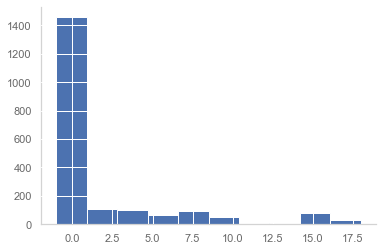

In [9]:
y.hist()

In [10]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state = 49)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1400, 2964), (600, 2964), (1400,), (600,))

## Bayes naïf

In [11]:
NaiveBayes = naive_bayes.GaussianNB().fit(X_train, y_train)
y_pred_train=NaiveBayes.predict(X_train)
y_pred_test=NaiveBayes.predict(X_test)
y_pred_train.shape,y_pred_test.shape

((1400,), (600,))

In [12]:
np.unique(y_pred_train)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 16, 17,
       18])

(array([881.,  94.,  80.,  55.,  85.,  43.,  13.,   8.,  57.,  84.]),
 array([-1. ,  0.9,  2.8,  4.7,  6.6,  8.5, 10.4, 12.3, 14.2, 16.1, 18. ]),
 <BarContainer object of 10 artists>)

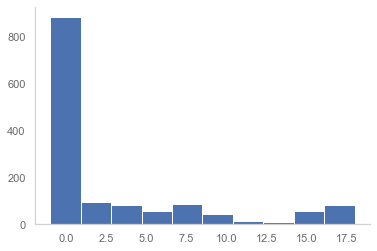

In [13]:
plt.hist(y_pred_train)

In [14]:
# scores exactitude, r2
accuracy = accuracy_score(y_test, y_pred_test) 
r2 = r2_score(y_test,y_pred_test)
accuracy, r2

(0.5066666666666667, -2.4850252326731415)

In [15]:
np.unique(y_test), np.unique(y_pred_test)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 16, 17, 18]),
 array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 16, 17, 18]))

In [16]:
dfConfusion=confusionMatrixAcc(y_test, y_pred_test)
dfConfusion.sort_values(by='Class')

,Class,TP,FP,TN,FN,TPR,FPR,Accuracy
0,-1,248,72,56,190,0.566210,0.562500,0.537102
1,0,0,4,304,8,0.000000,0.012987,0.962025
2,1,5,12,299,6,0.454545,0.038585,0.944099
3,2,8,21,296,6,0.571429,0.066246,0.918429
4,3,10,14,294,12,0.454545,0.045455,0.921212
5,4,7,13,297,10,0.411765,0.041935,0.929664
6,5,2,5,302,6,0.250000,0.016287,0.965079
7,6,1,5,303,9,0.100000,0.016234,0.955975
8,7,5,12,299,11,0.312500,0.038585,0.929664
9,8,8,12,296,2,0.800000,0.038961,0.955975


## Random forest

In [47]:
rfc = RandomForestClassifier(random_state=0)

rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [48]:
y_pred_train=rfc.predict(X_train)
y_pred_test=rfc.predict(X_test)
np.unique(y_pred_train)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 16, 17,
       18])

(array([1.012e+03, 3.800e+01, 4.500e+01, 4.600e+01, 1.700e+01, 1.900e+01,
        2.700e+01, 3.300e+01, 3.500e+01, 1.500e+01, 2.700e+01, 1.000e+01,
        0.000e+00, 5.000e+00, 1.000e+00, 0.000e+00, 5.200e+01, 1.800e+01]),
 array([-1.        ,  0.05555556,  1.11111111,  2.16666667,  3.22222222,
         4.27777778,  5.33333333,  6.38888889,  7.44444444,  8.5       ,
         9.55555556, 10.61111111, 11.66666667, 12.72222222, 13.77777778,
        14.83333333, 15.88888889, 16.94444444, 18.        ]),
 <BarContainer object of 18 artists>)

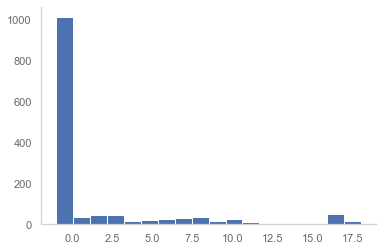

In [51]:
bins=len(np.unique(y_pred_train))
plt.hist(y_pred_train,bins=bins)

In [20]:
# scores exactitude, r2
accuracy = accuracy_score(y_test, y_pred_test) 
r2 = r2_score(y_test,y_pred_test)
accuracy, r2

(0.8383333333333334, 0.09577638018918178)

In [21]:
y_test.shape,y_pred_test.shape

((600,), (600,))

In [22]:
np.unique(y_test), np.unique(y_pred_test)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 16, 17, 18]),
 array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 16, 17, 18]))

In [23]:
dfConfusion=confusionMatrixAcc(y_test, y_pred_test)
dfConfusion.sort_values(by='Class')

,Class,TP,FP,TN,FN,TPR,FPR,Accuracy
0,-1,437,82,55,1,0.997717,0.598540,0.855652
1,0,4,0,488,4,0.500000,0.000000,0.991935
2,1,7,2,485,4,0.636364,0.004107,0.987952
3,2,8,1,484,6,0.571429,0.002062,0.985972
4,3,9,2,483,13,0.409091,0.004124,0.970414
5,4,2,0,490,15,0.117647,0.000000,0.970414
6,5,4,0,488,4,0.500000,0.000000,0.991935
7,6,7,1,485,3,0.700000,0.002058,0.991935
8,7,11,0,481,5,0.687500,0.000000,0.989940
9,8,3,0,489,7,0.300000,0.000000,0.985972


## Regression logistique

In [59]:
lr = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')

In [60]:
np.unique(y_train)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 16, 17,
       18])

In [61]:
lr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [62]:
lr.score(X_test,y_test)

0.73

In [65]:
y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)
np.unique(y_pred_train)

array([-1])

In [66]:
y_pred_train

array([-1, -1, -1, ..., -1, -1, -1])

(array([], dtype=float64), array([-1]), <BarContainer object of 0 artists>)

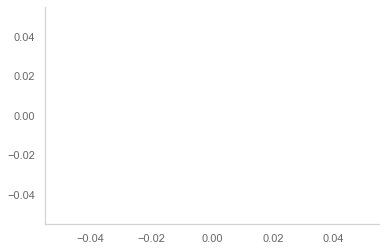

In [69]:
bins=np.unique(y_pred_train)
plt.hist(y_pred_train,bins=bins)

In [45]:
# scores exactitude, r2
accuracy = accuracy_score(y_test, y_pred_test) 
r2 = r2_score(y_test,y_pred_test)
accuracy, r2

(0.73, -0.22597190170669235)

In [46]:
dfConfusion=confusionMatrixAcc(y_test, y_pred_test)
dfConfusion

,Class,TP,FP,TN,FN,TPR,FPR,Accuracy
0,-1,438,162,0,0,1.0,1.0,0.73


## XGBoost

In [32]:
model=XGBClassifier(eta=0.1,n_estimators=100,max_depth=4,subsample=1,colsample_bytree=0.8,objective='multi:softmax')
model.fit(X_train,y_train)

/Users/hui-guan/opt/miniconda3/envs/python3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:02:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, eta=0.1, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
np.unique(y_pred_train)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 16, 18])

(array([1191.,   53.,   50.,   19.,   36.,   27.,    0.,    0.,   19.,
           5.]),
 array([-1. ,  0.9,  2.8,  4.7,  6.6,  8.5, 10.4, 12.3, 14.2, 16.1, 18. ]),
 <BarContainer object of 10 artists>)

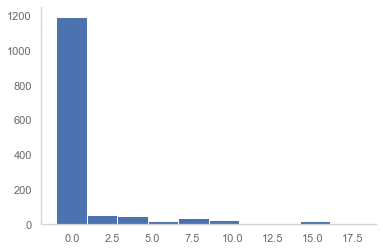

In [34]:
plt.hist(y_pred_train)

In [35]:
# scores exactitude, r2
accuracy = accuracy_score(y_test, y_pred_test) 
r2 = r2_score(y_test,y_pred_test)
accuracy, r2

(0.8116666666666666, 0.037449598052392785)

In [36]:
dfConfusion=confusionMatrixAcc(y_test, y_pred_test)
dfConfusion.sort_values(by='Class')

,Class,TP,FP,TN,FN,TPR,FPR,Accuracy
0,-1,436,100,42,2,0.995434,0.704225,0.824138
1,0,2,0,476,6,0.250000,0.000000,0.987603
2,1,5,1,473,6,0.454545,0.002110,0.985567
3,2,7,1,471,7,0.500000,0.002119,0.983539
4,3,9,2,469,13,0.409091,0.004246,0.969574
5,4,5,1,473,12,0.294118,0.002110,0.973523
6,5,1,0,477,7,0.125000,0.000000,0.985567
7,6,3,0,475,7,0.300000,0.000000,0.985567
8,7,10,2,468,6,0.625000,0.004255,0.983539
9,8,0,2,478,10,0.000000,0.004167,0.975510


## Reseau de neurones

### Monocouche

In [83]:
X_train.shape

(1400, 2964)

In [98]:
tf.config.run_functions_eagerly(True) #activation de l'execution en mode dynamique

# Parametres du reseau de neurones
EPOCHS = 60 # iterations
BATCH_SIZE = 256 #taille de l'echantillon par iteration
VERBOSE = 0
NB_CLASSES = 1   # nombre de neurones en sortie
N_HIDDEN = 350 # nombre de neurones des couches cachees = nombre d'observations/(2*(nombre de neurones input + nombre de neurones output))
VALIDATION_SPLIT = 0.2 # pourcentage des donnees d'entrainement reservées pour la validation
DROPOUT = 0.3

INPUT_SHAPE = X_train.shape

In [99]:
INPUT_SHAPE,y_train

((1400, 2964),
 1636    -1
 897     -1
 60      -1
 905     -1
 37      -1
 1145    -1
 796     -1
 1934    -1
 1862    -1
 1742     8
 686      5
 974     -1
         ..
 892     -1
 638     -1
 1925    -1
 453     16
 908      2
 1906    10
 1780    -1
 1206     6
 1525     1
 424     -1
 1709    -1
 426      1
 Length: 1400, dtype: int64)

In [100]:
# Creation du modele
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(2964,
    input_shape=INPUT_SHAPE,
    name='input_layer', 
    activation='relu'))
#model.add(tf.keras.layers.Dropout(DROPOUT))
model.add(tf.keras.layers.Dense(N_HIDDEN,
    name='hidden_layer_1',
    activation='relu'))
#model.add(tf.keras.layers.Dropout(DROPOUT))
#model.add(tf.keras.layers.Dense(N_HIDDEN,
#    name='hidden_layer_2',
#    activation='relu'))
#model.add(tf.keras.layers.Dropout(DROPOUT))
model.add(tf.keras.layers.Dense(NB_CLASSES,
    name='output_layer',
    activation='linear'))

In [101]:
# Caracteristique/description du modele
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 1400, 2964)        8788260   
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1400, 350)         1037750   
_________________________________________________________________
output_layer (Dense)         (None, 1400, 1)           351       
Total params: 9,826,361
Trainable params: 9,826,361
Non-trainable params: 0
_________________________________________________________________


In [102]:
# Compilation
model.compile(optimizer='SGD', #Stochastic Gradient Descent
              loss='MSE', # methode de calcul de cout
              metrics=['mean_squared_error']) # methode d'evaluation

In [103]:
%%time
callbacks = [
  #  Objet History pour monitorer les iterations
  tf.keras.callbacks.History(),
  # Logs pour TensorBoard dans le repertoire './logs' 
  #tf.keras.callbacks.TensorBoard(log_dir='./logs') # activation des logs pour TensorBoard
]

history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS , verbose = VERBOSE, validation_split = 0.2, callbacks = callbacks)

CPU times: user 1min 48s, sys: 27.4 s, total: 2min 15s
Wall time: 20.9 s


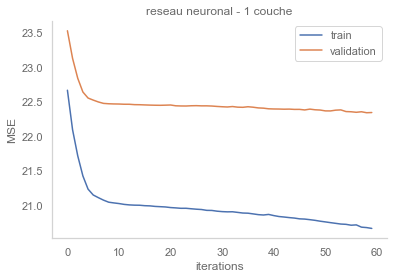

In [104]:
import matplotlib.pyplot as plt

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('reseau neuronal - 1 couche')
plt.ylabel('MSE')
plt.xlabel('iterations')
plt.legend(['train' , 'validation'] , loc = 'upper right')
plt.show()

In [105]:
y_pred_train=np.squeeze(model.predict_on_batch(X_train)) #helps to get rid of useless one dimension arrays 

In [106]:
np.unique(y_pred_train)

array([1.2477052, 1.2478904, 1.2479858, ..., 1.7113051, 1.7134821,
       1.7359655], dtype=float32)

## LDA

In [37]:
# instanciation du modele
model=LatentDirichletAllocation(n_components=20)

lda_matrix = model.fit_transform(X_train)

# recuperation des composantes
lda_components=model.components_

# termes des thematiques
terms = dfTFIDFCommon.columns

for index, component in enumerate(lda_components):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:7]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index)+": ",top_terms_list)

Topic 0:  ['file server', 'type error', 'display image', 'groupby string', 'sql server', 'one problem', 'tzinfo timezone']
Topic 1:  ['android studio', 'xml file', 'key value', 'sort nsarray', 'file struct', 'second hide', 'first row']
Topic 2:  ['java code', 'command line', 'node module', 'ezini instance', 'configure proxy', 'function python', 'android text']
Topic 3:  ['work properly', 'search engine', 'unique key', 'argument fopen', 'use argument', 'contest prize', 'app run']
Topic 4:  ['visual studio', 'include file', 'get result', 'def foo', 'android widget', 'bit integer', 'dialog iphone']
Topic 5:  ['ajax request', 'pattern match', 'pitfall avoid', 'remove string', 'web page', 'virtual function', 'resolv conf']
Topic 6:  ['name use', 'java need', 'return client', 'extension boost', 'list group', 'use regex', 'gi extension']
Topic 7:  ['change icon', 'file descriptor', 'multiple line', 'give error', 'infinite loop', 'descriptor assignment', 'circular dependency']
Topic 8:  ['drop